In [1]:
import scanpy as sc
import os

/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/optuna/study/_optimize.py:29: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from optuna import progress_bar as pbar_module


In [2]:
fig_dir = "/lustre/groups/ml01/workspace/ot_perturbation/figures/sciplex/data"

In [3]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/full_adata_with_splits.h5ad")

In [4]:
adata.obs.head()

,cell_type,dose,dose_character,dose_pattern,g1s_score,g2m_score,pathway,pathway_level_1,pathway_level_2,product_dose,...,n_genes,pubchem_name,pubchem_ID,smiles,control,ood_1,ood_2,ood_3,ood_4,ood_5
index,,,,,,,,,,,,,,,,,,,,,
A01_E09_RT_BC_100_Lig_BC_245-0-0,A549,1000.0,1000,2,1.155964,2.475312,TGF-beta/Smad,PKC signaling,PKC activitiy,Enzastaurin (LY317615)_1000,...,97,Enzastaurin,176167,CN1C=C(C2=CC=CC=C21)C3=C(C(=O)NC3=O)C4=CN(C5=C...,0,not ood,A549_Enzastaurin_(LY317615)_1000.0,not ood,not ood,not ood
A01_E09_RT_BC_100_Lig_BC_306-0-0,A549,10.0,10,4,0.000000,1.980748,DNA Damage,DNA damage & DNA repair,Nucleotide analog,Raltitrexed_10,...,40,Raltitrexed,135400182,CC1=NC2=C(C=C(C=C2)CN(C)C3=CC=C(S3)C(=O)NC(CCC...,0,not ood,not ood,not ood,A549_Raltitrexed_10.0,not ood
A01_E09_RT_BC_101_Lig_BC_109-0-0,A549,0.0,0,3,0.000000,0.000000,Vehicle,Vehicle,Vehicle,Vehicle_0,...,46,NaN,NaN,NaN,1,not ood,not ood,not ood,not ood,not ood
A01_E09_RT_BC_101_Lig_BC_229-0-0,A549,10.0,10,4,1.817254,2.801225,Apoptosis,Protein folding & Protein degradation,E3 ubiquitin ligase activity,Lenalidomide (CC-5013)_10,...,42,Lenalidomide,216326,C1CC(=O)NC(=O)C1N2CC3=C(C2=O)C=CC=C3N,0,not ood,not ood,not ood,A549_Lenalidomide_(CC-5013)_10.0,not ood
A01_E09_RT_BC_101_Lig_BC_280-0-0,A549,1000.0,1000,2,1.637016,0.867074,Ubiquitin,Epigenetic regulation,Histone deacetylation,Divalproex Sodium_1000,...,54,DIVALPROEX SODIUM,23663956,CCCC(CCC)C(=O)O.CCCC(CCC)C(=O)[O-].[Na+],0,not ood,A549_Divalproex_Sodium_1000.0,not ood,not ood,not ood


In [5]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 2001 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


In [6]:
cell_line_palette = {"A549": "#1abc9c" , "K562": "#f5cba7", "MCF7": "#c0392b"}

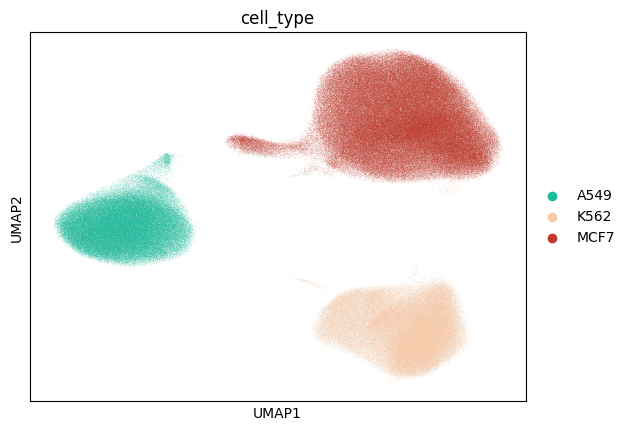

In [16]:
fig = sc.pl.umap(adata, color="cell_type", palette=cell_line_palette, return_fig=True)
fig.savefig(os.path.join(fig_dir, "cell_lines.pdf"))
fig.savefig(os.path.join(fig_dir, "cell_lines.png"))

In [17]:
adata.obs["is_control"] = adata.obs.apply(lambda x: "control" if x["control"]==1 else "not control", axis=1)
control_palette={'control': '#000000',
    'not control': '#B6B6B6',}

/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


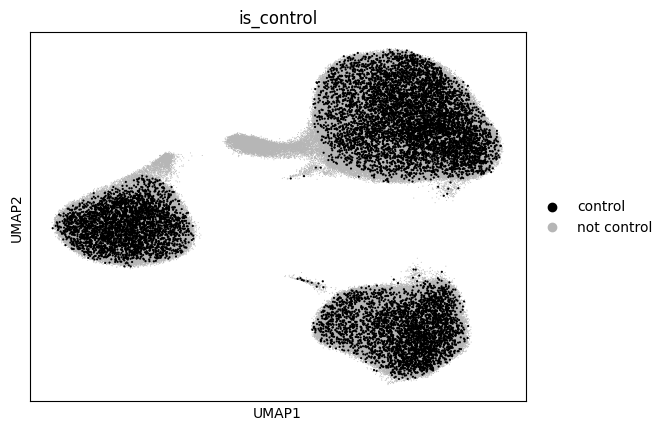

In [18]:

order = list(adata[adata.obs["is_control"]=="not control"].obs_names) + list(adata[adata.obs["is_control"]=="control"].obs_names) 
sizes = adata[order].obs.apply(lambda x: 2.0 if x["is_control"]=="not control" else 10.0, axis=1).values
fig = sc.pl.umap(adata[order], color="is_control", palette=control_palette, size=sizes, return_fig=True)
fig.savefig(os.path.join(fig_dir, "is_control.pdf"))
fig.savefig(os.path.join(fig_dir, "is_control.png"))

In [19]:
adata.obs["is_10"] = adata.obs.apply(lambda x: "is_10" if x["dose"]==10.0 else "other", axis=1)
adata.obs["is_100"] = adata.obs.apply(lambda x: "is_100" if x["dose"]==100.0 else "other", axis=1)
adata.obs["is_1000"] = adata.obs.apply(lambda x: "is_1000" if x["dose"]==1000.0 else "other", axis=1)
adata.obs["is_10000"] = adata.obs.apply(lambda x: "is_10000" if x["dose"]==10000.0 else "other", axis=1)

In [20]:
dose_palette = {"is_10": "#ebdef0", "is_100": "#c39bd3", "is_1000": "#884ea0", "is_10000": "#512e5f", "other":'#B6B6B6' }

/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModification

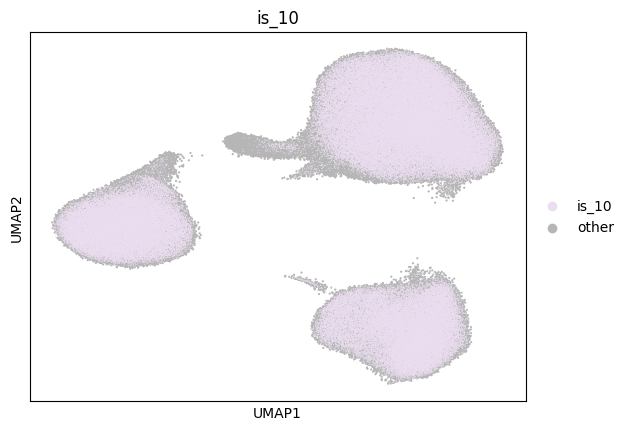

In [21]:
order = list(adata[adata.obs["is_10"]!="is_10"].obs_names) + list(adata[adata.obs["is_10"]=="is_10"].obs_names) 
sizes = adata[order].obs.apply(lambda x: 2.0 if x["is_10"]=="is_10" else 10.0, axis=1).values
fig = sc.pl.umap(adata[order], color="is_10", palette=dose_palette, size=sizes, return_fig=True)
fig.savefig(os.path.join(fig_dir, "dosage_10.pdf"))
fig.savefig(os.path.join(fig_dir, "dosage_10.png"))

/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModification

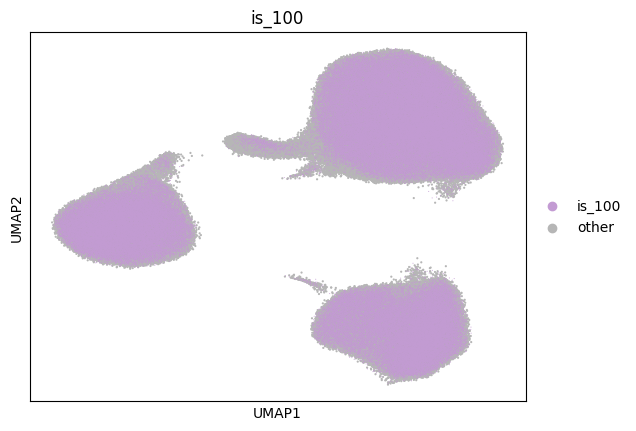

In [22]:
order = list(adata[adata.obs["is_100"]!="is_100"].obs_names) + list(adata[adata.obs["is_100"]=="is_100"].obs_names) 
sizes = adata[order].obs.apply(lambda x: 2.0 if x["is_100"]=="is_100" else 10.0, axis=1).values
fig = sc.pl.umap(adata[order], color="is_100", palette=dose_palette, size=sizes, return_fig=True)
fig.savefig(os.path.join(fig_dir, "dosage_100.pdf"))
fig.savefig(os.path.join(fig_dir, "dosage_100.png"))

/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModification

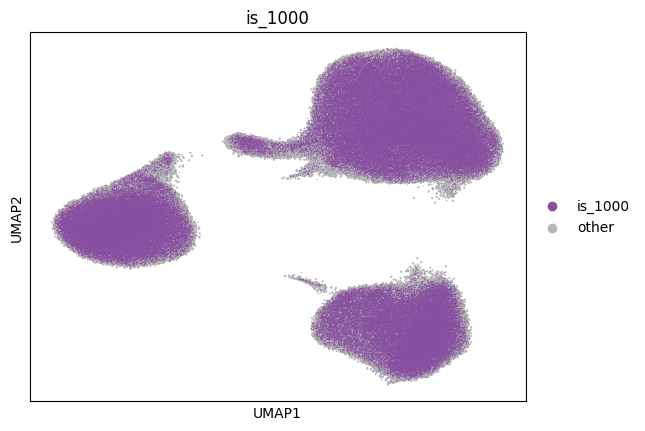

In [23]:
order = list(adata[adata.obs["is_1000"]!="is_1000"].obs_names) + list(adata[adata.obs["is_1000"]=="is_1000"].obs_names) 
sizes = adata[order].obs.apply(lambda x: 2.0 if x["is_1000"]=="is_1000" else 10.0, axis=1).values
fig = sc.pl.umap(adata[order], color="is_1000", palette=dose_palette, size=sizes, return_fig=True)
fig.savefig(os.path.join(fig_dir, "dosage_1000.pdf"))
fig.savefig(os.path.join(fig_dir, "dosage_1000.png"))

/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModification

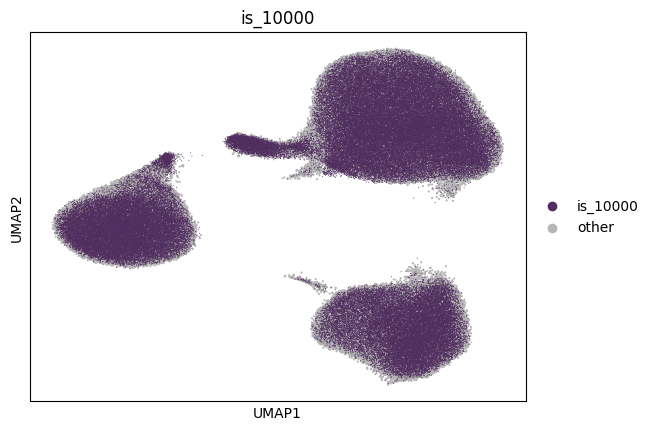

In [24]:
order = list(adata[adata.obs["is_10000"]!="is_10000"].obs_names) + list(adata[adata.obs["is_10000"]=="is_10000"].obs_names) 
sizes = adata[order].obs.apply(lambda x: 2.0 if x["is_10000"]=="is_10000" else 10.0, axis=1).values
fig = sc.pl.umap(adata[order], color="is_10000", palette=dose_palette, size=sizes, return_fig=True)
fig.savefig(os.path.join(fig_dir, "dosage_10000.pdf"))
fig.savefig(os.path.join(fig_dir, "dosage_10000.png"))